In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analysis_functions import Analysis

In [17]:
uqc_1qubit_path = "../../results/qubitsvslayers/1qubit_5layers"
uqc_2qubits_path = "../../results/qubitsvslayers/2qubits_5layers"
uqc_4qubits_path = "../../results/qubitsvslayers/4qubits_5layers"
uqc_6qubits_path = "../../results/qubitsvslayers/6qubits_5layers"
uqc_8qubits_path = "../../results/qubitsvslayers/8qubits_5layers"

uqc_1qubit = Analysis(uqc_1qubit_path)
uqc_2qubits = Analysis(uqc_2qubits_path)
uqc_4qubits = Analysis(uqc_4qubits_path)
uqc_6qubits = Analysis(uqc_6qubits_path)
uqc_8qubits = Analysis(uqc_8qubits_path)

### Performance

In [18]:
uqc_1qubit_return = uqc_1qubit.get_rewards()
uqc_2qubits_return = uqc_2qubits.get_rewards()
uqc_4qubits_return = uqc_4qubits.get_rewards()
uqc_6qubits_return = uqc_6qubits.get_rewards()
uqc_8qubits_return = uqc_8qubits.get_rewards()

uqc_1qubit_mean = np.mean(uqc_1qubit_return, axis = 0)
uqc_2qubits_mean = np.mean(uqc_2qubits_return, axis = 0)
uqc_4qubits_mean = np.mean(uqc_4qubits_return, axis = 0)
uqc_6qubits_mean = np.mean(uqc_6qubits_return, axis = 0)
uqc_8qubits_mean = np.mean(uqc_8qubits_return, axis = 0)

uqc_1qubit_std = np.std(uqc_1qubit_return, axis = 0)
uqc_2qubits_std = np.std(uqc_2qubits_return, axis = 0)
uqc_4qubits_std = np.std(uqc_4qubits_return, axis = 0)
uqc_6qubits_std = np.std(uqc_6qubits_return, axis = 0)
uqc_8qubits_std = np.std(uqc_8qubits_return, axis = 0)

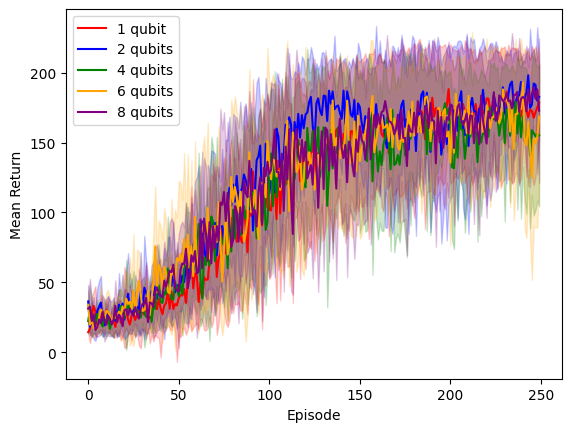

In [19]:
plt.plot(uqc_1qubit_mean, color = 'red', label = '1 qubit')
plt.plot(uqc_2qubits_mean, color = 'blue', label = '2 qubits')
plt.plot(uqc_4qubits_mean, color = 'green', label = '4 qubits')
plt.plot(uqc_6qubits_mean, color = 'orange', label = '6 qubits')
plt.plot(uqc_8qubits_mean, color = 'purple', label = '8 qubits')
plt.fill_between(np.arange(len(uqc_1qubit_mean)), uqc_1qubit_mean - uqc_1qubit_std, uqc_1qubit_mean + uqc_1qubit_std, alpha = 0.2, color = 'red')
plt.fill_between(np.arange(len(uqc_2qubits_mean)), uqc_2qubits_mean - uqc_2qubits_std, uqc_2qubits_mean + uqc_2qubits_std, alpha = 0.2, color = 'blue')
plt.fill_between(np.arange(len(uqc_4qubits_mean)), uqc_4qubits_mean - uqc_4qubits_std, uqc_4qubits_mean + uqc_4qubits_std, alpha = 0.2, color = 'green')
plt.fill_between(np.arange(len(uqc_6qubits_mean)), uqc_6qubits_mean - uqc_6qubits_std, uqc_6qubits_mean + uqc_6qubits_std, alpha = 0.2, color = 'orange')
plt.fill_between(np.arange(len(uqc_8qubits_mean)), uqc_8qubits_mean - uqc_8qubits_std, uqc_8qubits_mean + uqc_8qubits_std, alpha = 0.2, color = 'purple')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Mean Return')
plt.show()


### Gradients

In [20]:
uqc_1qubit_mean_gradients, uqc_1qubit_mean_variance = uqc_1qubit.calculate_mean_variance_gradients()
uqc_2qubits_mean_gradients, uqc_2qubits_mean_variance = uqc_2qubits.calculate_mean_variance_gradients()
uqc_4qubits_mean_gradients, uqc_4qubits_mean_variance = uqc_4qubits.calculate_mean_variance_gradients()
uqc_6qubits_mean_gradients, uqc_6qubits_mean_variance = uqc_6qubits.calculate_mean_variance_gradients()
uqc_8qubits_mean_gradients, uqc_8qubits_mean_variance = uqc_8qubits.calculate_mean_variance_gradients()

In [21]:
uqc_1qubit_mean_gradients_smoothed = pd.Series(uqc_1qubit_mean_gradients).rolling(250).mean()
uqc_2qubits_mean_gradients_smoothed = pd.Series(uqc_2qubits_mean_gradients).rolling(250).mean()
uqc_4qubits_mean_gradients_smoothed = pd.Series(uqc_4qubits_mean_gradients).rolling(250).mean()
uqc_6qubits_mean_gradients_smoothed = pd.Series(uqc_6qubits_mean_gradients).rolling(250).mean()
uqc_8qubits_mean_gradients_smoothed = pd.Series(uqc_8qubits_mean_gradients).rolling(250).mean()

uqc_1qubit_mean_variance_smoothed = pd.Series(uqc_1qubit_mean_variance).rolling(250).mean()
uqc_2qubits_mean_variance_smoothed = pd.Series(uqc_2qubits_mean_variance).rolling(250).mean()
uqc_4qubits_mean_variance_smoothed = pd.Series(uqc_4qubits_mean_variance).rolling(250).mean()
uqc_6qubits_mean_variance_smoothed = pd.Series(uqc_6qubits_mean_variance).rolling(250).mean()
uqc_8qubits_mean_variance_smoothed = pd.Series(uqc_8qubits_mean_variance).rolling(250).mean()


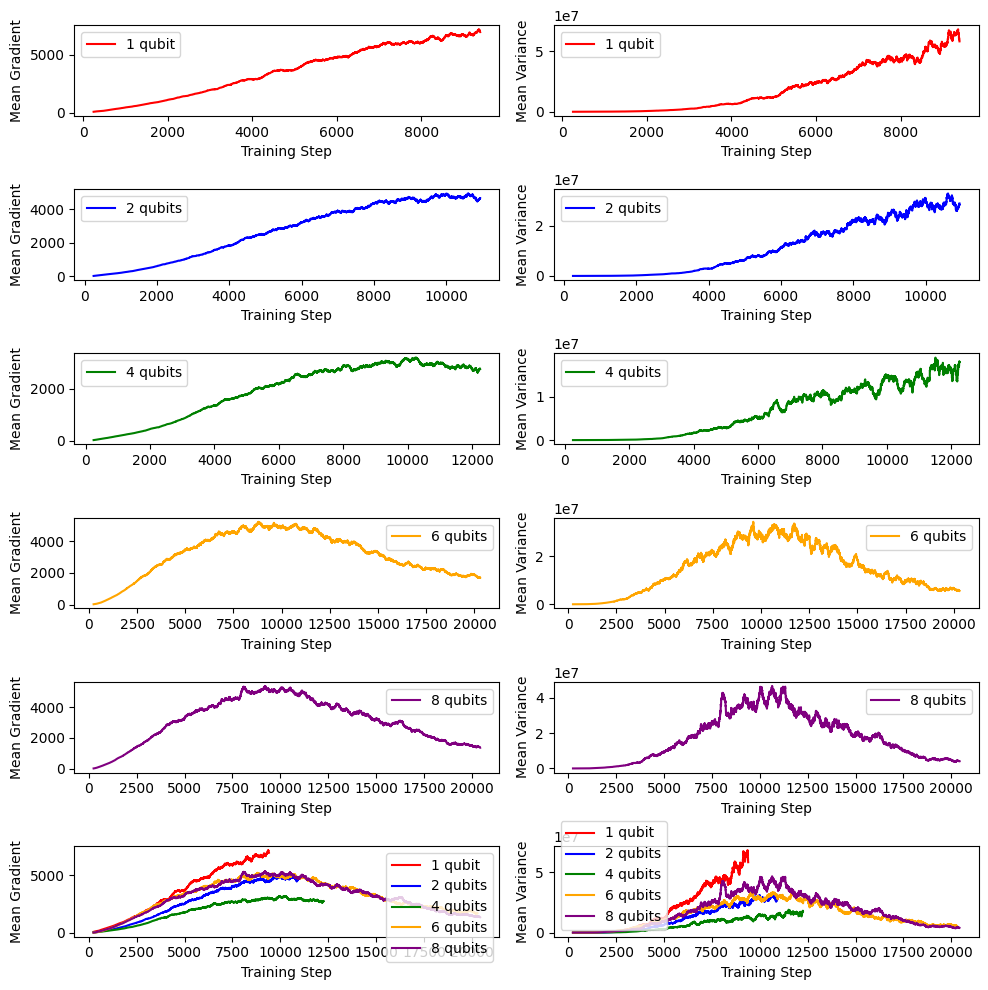

In [22]:
fig, axs = plt.subplots(6,2, figsize = (10, 10), tight_layout = True)

axs[0,0].plot(uqc_1qubit_mean_gradients_smoothed, color = 'red', label = '1 qubit')
axs[0,0].legend()
axs[0,0].set_xlabel('Training Step')
axs[0,0].set_ylabel('Mean Gradient')

axs[0,1].plot(uqc_1qubit_mean_variance_smoothed, color = 'red', label = '1 qubit')
axs[0,1].legend()
axs[0,1].set_xlabel('Training Step')
axs[0,1].set_ylabel('Mean Variance')

axs[1,0].plot(uqc_2qubits_mean_gradients_smoothed, color = 'blue', label = '2 qubits')
axs[1,0].legend()
axs[1,0].set_xlabel('Training Step')
axs[1,0].set_ylabel('Mean Gradient')

axs[1,1].plot(uqc_2qubits_mean_variance_smoothed, color = 'blue', label = '2 qubits')
axs[1,1].legend()
axs[1,1].set_xlabel('Training Step')
axs[1,1].set_ylabel('Mean Variance')

axs[2,0].plot(uqc_4qubits_mean_gradients_smoothed, color = 'green', label = '4 qubits')
axs[2,0].legend()
axs[2,0].set_xlabel('Training Step')
axs[2,0].set_ylabel('Mean Gradient')

axs[2,1].plot(uqc_4qubits_mean_variance_smoothed, color = 'green', label = '4 qubits')
axs[2,1].legend()
axs[2,1].set_xlabel('Training Step')
axs[2,1].set_ylabel('Mean Variance')

axs[3,0].plot(uqc_6qubits_mean_gradients_smoothed, color = 'orange', label = '6 qubits')
axs[3,0].legend()
axs[3,0].set_xlabel('Training Step')
axs[3,0].set_ylabel('Mean Gradient')

axs[3,1].plot(uqc_6qubits_mean_variance_smoothed, color = 'orange', label = '6 qubits')
axs[3,1].legend()
axs[3,1].set_xlabel('Training Step')
axs[3,1].set_ylabel('Mean Variance')

axs[4,0].plot(uqc_8qubits_mean_gradients_smoothed, color = 'purple', label = '8 qubits')
axs[4,0].legend()
axs[4,0].set_xlabel('Training Step')
axs[4,0].set_ylabel('Mean Gradient')

axs[4,1].plot(uqc_8qubits_mean_variance_smoothed, color = 'purple', label = '8 qubits')
axs[4,1].legend()
axs[4,1].set_xlabel('Training Step')
axs[4,1].set_ylabel('Mean Variance')

axs[5,0].plot(uqc_1qubit_mean_gradients_smoothed, color = 'red', label = '1 qubit')
axs[5,0].plot(uqc_2qubits_mean_gradients_smoothed, color = 'blue', label = '2 qubits')
axs[5,0].plot(uqc_4qubits_mean_gradients_smoothed, color = 'green', label = '4 qubits')
axs[5,0].plot(uqc_6qubits_mean_gradients_smoothed, color = 'orange', label = '6 qubits')
axs[5,0].plot(uqc_8qubits_mean_gradients_smoothed, color = 'purple', label = '8 qubits')
axs[5,0].legend()
axs[5,0].set_xlabel('Training Step')
axs[5,0].set_ylabel('Mean Gradient')

axs[5,1].plot(uqc_1qubit_mean_variance_smoothed, color = 'red', label = '1 qubit')
axs[5,1].plot(uqc_2qubits_mean_variance_smoothed, color = 'blue', label = '2 qubits')
axs[5,1].plot(uqc_4qubits_mean_variance_smoothed, color = 'green', label = '4 qubits')
axs[5,1].plot(uqc_6qubits_mean_variance_smoothed, color = 'orange', label = '6 qubits')
axs[5,1].plot(uqc_8qubits_mean_variance_smoothed, color = 'purple', label = '8 qubits')
axs[5,1].legend()
axs[5,1].set_xlabel('Training Step')
axs[5,1].set_ylabel('Mean Variance')

plt.show()

In [23]:
uqc_1qubit_parameters_change = uqc_1qubit.get_parameters_relative_change()
uqc_2qubits_parameters_change = uqc_2qubits.get_parameters_relative_change()
uqc_4qubits_parameters_change = uqc_4qubits.get_parameters_relative_change()
uqc_6qubits_parameters_change = uqc_6qubits.get_parameters_relative_change()
uqc_8qubits_parameters_change = uqc_8qubits.get_parameters_relative_change()

In [34]:
def filter_lists(lists):
    min_lengths =  [len(lst) for lst in lists]  # Get the length of each list
    min_length = min(min_lengths)  # Get the minimum length
    
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:min_length]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

uqc_1qubit_parameters_change, uqc_2qubits_parameters_change, uqc_4qubits_parameters_change, uqc_6qubits_parameters_change, uqc_8qubits_parameters_change = filter_lists([uqc_1qubit_parameters_change, uqc_2qubits_parameters_change, uqc_4qubits_parameters_change, uqc_6qubits_parameters_change, uqc_8qubits_parameters_change])

uqc_1qubit_parameters_change_mean = np.mean(uqc_1qubit_parameters_change, axis = 0)
uqc_2qubits_parameters_change_mean = np.mean(uqc_2qubits_parameters_change, axis = 0)
uqc_4qubits_parameters_change_mean = np.mean(uqc_4qubits_parameters_change, axis = 0)
uqc_6qubits_parameters_change_mean = np.mean(uqc_6qubits_parameters_change, axis = 0)
uqc_8qubits_parameters_change_mean = np.mean(uqc_8qubits_parameters_change, axis = 0)

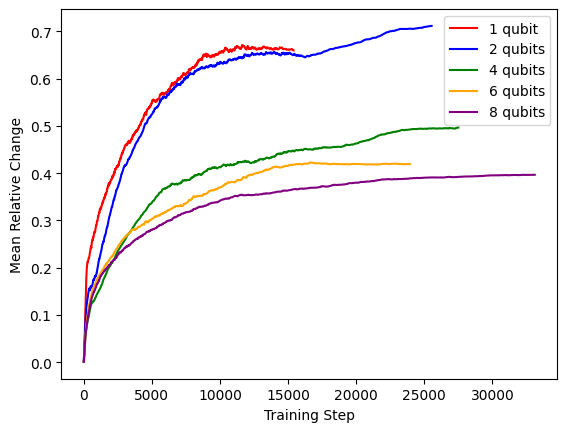

In [35]:
plt.plot(uqc_1qubit_parameters_change_mean, color = 'red', label = '1 qubit')
plt.plot(uqc_2qubits_parameters_change_mean, color = 'blue', label = '2 qubits')
plt.plot(uqc_4qubits_parameters_change_mean, color = 'green', label = '4 qubits')
plt.plot(uqc_6qubits_parameters_change_mean, color = 'orange', label = '6 qubits')
plt.plot(uqc_8qubits_parameters_change_mean, color = 'purple', label = '8 qubits')
plt.legend()
plt.xlabel('Training Step')
plt.ylabel('Mean Relative Change')
plt.show()
